### Importing the required packages, modules and methods

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

### Importing data from the files

In [42]:
# Reading data from the files
data= pd.read_csv("KidCreative.csv")
data.head(n=10)

,Obs No.,Buy,Income,Is Female,Is Married,Has College,Is Professional,Is Retired,Unemployed,Residence Length,Dual Income,Minors,Own,House,White,English,Prev Child Mag,Prev Parent Mag
0,1,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0
1,2,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0
2,3,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0
3,4,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0
4,5,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1
5,6,0,24000,1,1,0,0,0,0,41,0,0,1,1,0,0,0,0
6,7,0,26000,1,1,1,0,1,0,20,0,1,1,1,1,1,0,0
7,8,0,38000,1,1,0,0,1,0,8,0,0,1,1,1,1,0,0
8,9,0,39000,1,0,1,1,0,0,17,0,0,0,0,1,1,0,0
9,10,0,49000,0,1,0,0,1,0,31,0,0,1,1,1,1,0,0


### Cleaning the data

In [43]:
data.columns

Index(['Obs No.', 'Buy', 'Income', 'Is Female', 'Is Married', 'Has College',
       'Is Professional', 'Is Retired', 'Unemployed', 'Residence Length',
       'Dual Income', 'Minors', 'Own', 'House', 'White', 'English',
       'Prev Child Mag', 'Prev Parent Mag'],
      dtype='object')

The column 'Obs No' has no relevance in the model that we are training and so it is better if we dropped that column altogether.

In [44]:
data.drop(columns=['Obs No.'], inplace=True)

It is necessary to make sure that none of the columns have null values in them.

In [45]:
#Checking for null values
data.isnull().sum()

Buy                 0
Income              0
Is Female           0
Is Married          0
Has College         0
Is Professional     0
Is Retired          0
Unemployed          0
Residence Length    0
Dual Income         0
Minors              0
Own                 0
House               0
White               0
English             0
Prev Child Mag      0
Prev Parent Mag     0
dtype: int64

It is necessary to divide the columns of the dataset into dependent ie., the target variable and independent variables.

In [46]:
# Assigning the dependent and independent variables to respective variables.
x = data[['Income', 'Is Female', 'Is Married', 'Has College', 'Is Professional', 'Is Retired', 'Unemployed', 'Residence Length', 'Dual Income','Minors','Own', 'House','White',
'English', 'Prev Child Mag', 'Prev Parent Mag']]
y = data['Buy']

### Splitting the data

It is necessary to split the dataset into the testing set and training set in order to build the model

In [47]:
#Splitting the dataset using the train_test_split method

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

### Applying the Logistic Regression algorithm

In [48]:
# Using the LogisticRegression method to implement the algorithm
log_regressor = LogisticRegression()

#Fitting the regression model
log_regressor.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting the results of the model

In [49]:
y_pred=log_regressor.predict(x_test)

### Evaluating the model

Developing a confusion matrix.

In [50]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[90, 24],
       [11, 10]])

### Visualizing the model

Text(0.5, 257.44, 'Predicted label')

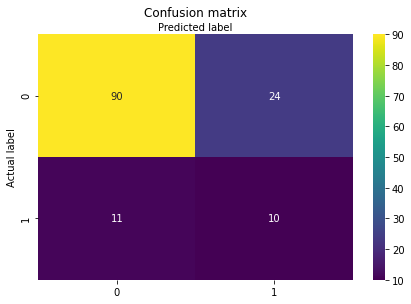

In [51]:
#Visualizing the confusion matrix using a heatmap
class_names=[1,2,3]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Printing the accuracy, precision and recall_score of the model.

In [52]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7407407407407407
Precision: 0.29411764705882354
Recall: 0.47619047619047616


### Plotting the Receiver Operating Characteristic curve

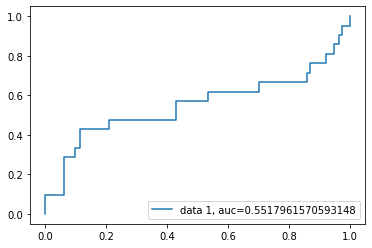

In [53]:
# Plotting the ROC curve
y_pred_proba = log_regressor.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()